## MLP: Initializations

In [ ]:
## MLP: Initializations# https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/multi_layer_perceptron_mnist.html
# https://github.com/wagonhelm/NaNmnist/blob/master/NaNmnist.ipynb
# https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/neural_network.ipynb

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, y, y_1, ax, ticks,title, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)=Fkee=1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

In [ ]:
# Network Parameters
n_hidden_1 = 512 # 1st layer number of neurons
n_hidden_2 = 128 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [ ]:
# x isn't a specific value. It's a placeholder, a value that we'll input when we ask TensorFlow to run a computation.
# We want to be able to input any number of MNIST images, each flattened into a 784-dimensional vector. 
# We represent this as a 2-D tensor of floating-point numbers, with a shape X = [None, 784]. 
# (Here None means that a dimension can be of any length.)
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# keep_prob: we will be using these placeholders when we use dropouts, while testing model
keep_prob = tf.placeholder(tf.float32)
# keep_prob_input: we will be using these placeholders when we use dropouts, while training model
keep_prob_input = tf.placeholder(tf.float32)

In [ ]:
# Weight initialization

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# https://www.tensorflow.org/api_docs/python/tf/random_normal
# Outputs random values from a normal distribution mean=0 std=1

# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(fan_in+fan_out+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(fan_in+fan_out+1) = 0.055  => N(0,σ) = N(0,0.055)
# out =>  σ=√(2/(fan_in+fan_out+1) = 0.120  => N(0,σ) = N(0,0.120)
# SGD: Xavier/Glorot Normal initialization.
weights_sgd = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=0.039, mean=0)),    #784x512 # sqrt(2/(784+512)) = 0.039
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=0.055, mean=0)), #512x128 # sqrt(2/(512+128)) = 0.055
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes],stddev=0.120, mean=0))  #128x10
}


# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu lates
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in+1) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in+1) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)
# He Normal initialization.
weights_relu = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=0.062, mean=0)),    #784x512
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=0.125, mean=0)), #512x128
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes],stddev=0.120, mean=0))  #128x10
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),             #512x1
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),             #128x1
    'out': tf.Variable(tf.random_normal([n_classes]))              #10x1
}

In [ ]:
# Parameters
training_epochs = 15
learning_rate = 0.001
batch_size = 100
display_step = 1

<h3> Model 1: input (784) - sigmoid(512) - sigmoid(128) - 
softmax(output 10) </h3>

In [ ]:
# https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/multi_layer_perceptron_mnist.html
# Create model
def multilayer_perceptron(x, weights, biases):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    
    # Hidden layer with Sigmoid activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    layer_1 = tf.nn.sigmoid(layer_1)
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    
    # Hidden layer with Sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    layer_2 = tf.nn.sigmoid(layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', biases['out'].get_shape())        
    
    # Output layer with Sigmoid activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out']    
    out_layer = tf.nn.sigmoid(out_layer)
    print('out_layer:',out_layer.get_shape())

    return out_layer

__ Model 1 + AdamOptimizer __

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Epoch: 0001 train cost=1.681823547 test cost=1.676311211
Epoch: 0002 train cost=1.538490382 test cost=1.536218471
Epoch: 0003 train cost=1.515721546 test cost=1.516237581
Epoch: 0004 train cost=1.503663794 test cost=1.505241357
Epoch: 0005 train cost=1.495330883 test cost=1.497797373
Epoch: 0006 train cost=1.489064606 test cost=1.492622907
Epoch: 0007 train cost=1.484618232 test cost=1.489168651
Epoch: 0008 train cost=1.480839387 test cost=1.486846633
Epoch: 0009 train cost=1.477865693 test cost=1.484905369
Epoch: 0010 train cost=1.475599988 test cost=1.483736856
Epoch: 0011 train cost=1.473791684 test cost=1.482444747
Epoch: 0012 train cost=1.

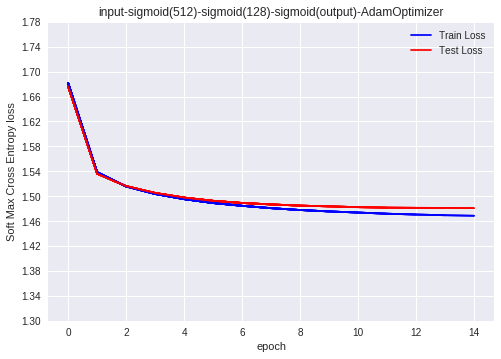

In [ ]:
# Since we are using sigmoid activations in hiden layers we will be using weights that are initalized as weights_sgd
y_sgd = multilayer_perceptron(x, weights_sgd, biases)

# https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
cost_sgd = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_sgd, labels = y_))

# https://github.com/amitmac/Question-Answering/issues/2
# there are many optimizers available: https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 
optimizer_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)
optimizer_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here c: corresponds to the parameter cost_sgd
            # w : correspondse to the parameter weights_sgd
            # c = sess.run() return the cost after every bath during train
            # w = sess.run() return the weights that are modified after every batch through Back prop
            # w is dict w = {'h1': updated h1 weight vector after the current batch,
            #                'h2': updated h2 weight vector after the current batch, 
            #                'out': updated output weight vector after the current batch, 
            #                }
            # you check these w matrix for every iteration, and check whats happening during back prop
            #
            # note: sess.run() returns parameter values based on the input parameters
            # _, c, w = sess.run([optimizer_adam, cost_sgd,weights_sgd]) it returns three parameters
            # _, c = sess.run([optimizer_adam, cost_sgd ]) it returns two parameters
            # _ = sess.run([optimizer_adam]) it returns one paramter (for the input optimizer it return none)
            # c = sess.run([cost_sgd]) it returns one paramter (for the input cost return error after the batch)

            # feed_dict={x: batch_xs, y_: batch_ys} here x, y_ should be placeholders
            # x, y_ are the input parameters on which the models gets trained

            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_adam, cost_sgd,weights_sgd], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_sgd, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_sgd,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


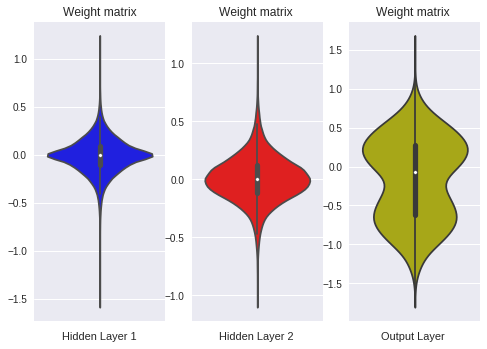

In [ ]:
# Plot weight distriubtion at the end of training.

import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

__ Model 1 + GradientDescentOptimizer __

Epoch: 0001 train cost=2.319404572 test cost=2.318047826
Epoch: 0002 train cost=2.316184991 test cost=2.314944556
Epoch: 0003 train cost=2.313415619 test cost=2.312310369
Epoch: 0004 train cost=2.311047141 test cost=2.310042647
Epoch: 0005 train cost=2.309026067 test cost=2.308095952
Epoch: 0006 train cost=2.307287374 test cost=2.306472156
Epoch: 0007 train cost=2.305776415 test cost=2.305014431
Epoch: 0008 train cost=2.304444027 test cost=2.303744715
Epoch: 0009 train cost=2.303249972 test cost=2.302621931
Epoch: 0010 train cost=2.302166392 test cost=2.301561712
Epoch: 0011 train cost=2.301172580 test cost=2.300602047
Epoch: 0012 train cost=2.300254010 test cost=2.299707088
Epoch: 0013 train cost=2.299401874 test cost=2.298892814
Epoch: 0014 train cost=2.298614489 test cost=2.298106769
Epoch: 0015 train cost=2.297889533 test cost=2.297402518
Accuracy: 0.0974


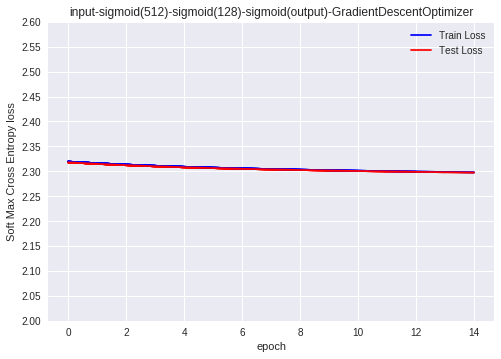

In [ ]:
# We can now launch the model in an InteractiveSession

# We first have to create an operation to initialize the variables we created:
# https://github.com/amitmac/Question-Answering/issues/2

# Note: make sure you initialize variables.

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here we use GradientDescentOptimizer
            _, c, w = sess.run([optimizer_sgdc, cost_sgd, weights_sgd], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_sgd, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(2, 2.6, step=0.05), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-GradientDescentOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(2, 2.6, step=0.05), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-GradientDescentOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_sgd,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


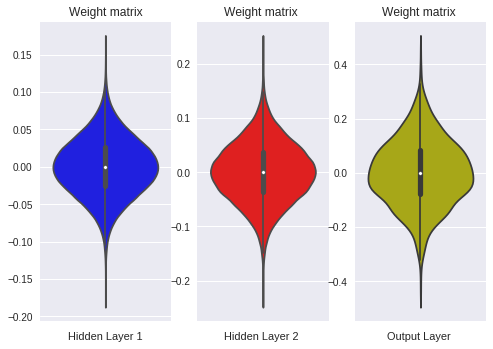

In [ ]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Model 2: input (784) - ReLu(512) - ReLu(128) - sigmoid(output 10) </h3>

In [ ]:
# https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/multi_layer_perceptron_mnist.html
# Create model
def multilayer_perceptron_relu(x, weights, biases):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    
    # Hidden layer with ReLu activation
    # https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    layer_1 = tf.nn.relu(layer_1)
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    
    # Hidden layer with ReLu activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    layer_2 = tf.nn.relu(layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', biases['out'].get_shape())        
    
    # Output layer with Sigmoid activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out']    
    out_layer = tf.nn.sigmoid(out_layer)
    print('out_layer:',out_layer.get_shape())

    return out_layer

__ Input-ReLu(512)-ReLu(128)-sigmoid(output) - AdamOptimizer  __

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 train cost=1.562207396 test cost=1.556652784
Epoch: 0002 train cost=1.500463881 test cost=1.501601754
Epoch: 0003 train cost=1.488371294 test cost=1.492026712
Epoch: 0004 train cost=1.482039372 test cost=1.487420058
Epoch: 0005 train cost=1.477783545 test cost=1.484849013
Epoch: 0006 train cost=1.474736516 test cost=1.483547766
Epoch: 0007 train cost=1.472646466 test cost=1.482295828
Epoch: 0008 train cost=1.471696293 test cost=1.482177148
Epoch: 0009 train cost=1.469835149 test cost=1.481312513
Epoch: 0010 train cost=1.469276900 test cost=1.480974347
Epoch: 0011 train cost=1.468788507 test cost=1.480446307
Epoch: 0012 train cost=1.468029417 test cost=1.480591303
Epoch: 0013 train cost=1.468475725 test cost=1.480107398
Epoch: 0014 train cost=1.466739849 test cost=1.479299975
Epoch: 0015 train cost=1.466718120 test cos

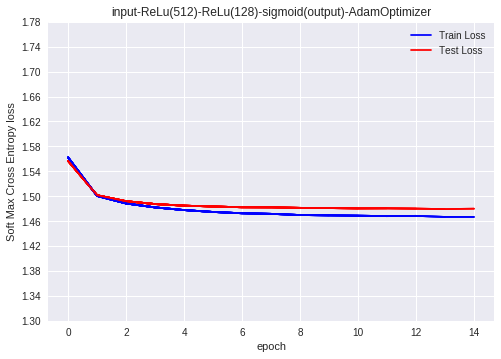

In [ ]:
# Since we are using Relu activations in hiden layers we will be using weights that are initalized as weights_relu
yrelu = multilayer_perceptron_relu(x, weights_relu, biases)

# https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = yrelu, labels = y_))
# https://github.com/amitmac/Question-Answering/issues/2
# there are many optimizers available: https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 
optimizer_relu_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)
optimizer_relu_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_relu)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_relu_adam, cost_relu, weights_relu], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_relu, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-ReLu(512)-ReLu(128)-sigmoid(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(1.3, 1.8, step=0.04), "input-ReLu(512)-ReLu(128)-sigmoid(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(yrelu,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


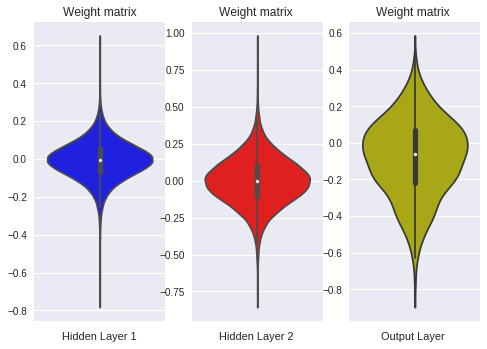

In [ ]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

__Input-ReLu(512)-ReLu(128)-sigmoid(output) - GradientDescentOptimizer__

Epoch: 0001 train cost=2.310429324 test cost=2.309331124
Epoch: 0002 train cost=2.221610156 test cost=2.218818418
Epoch: 0003 train cost=2.142771041 test cost=2.139230260
Epoch: 0004 train cost=2.075905863 test cost=2.071342851
Epoch: 0005 train cost=2.027072112 test cost=2.021270330
Epoch: 0006 train cost=1.987932869 test cost=1.981295761
Epoch: 0007 train cost=1.956008127 test cost=1.948708092
Epoch: 0008 train cost=1.929796880 test cost=1.922126883
Epoch: 0009 train cost=1.908102709 test cost=1.900147488
Epoch: 0010 train cost=1.889981364 test cost=1.881854080
Epoch: 0011 train cost=1.874673119 test cost=1.866476579
Epoch: 0012 train cost=1.861609627 test cost=1.853379037
Epoch: 0013 train cost=1.850336982 test cost=1.842097878
Epoch: 0014 train cost=1.840515356 test cost=1.832302262
Epoch: 0015 train cost=1.831871038 test cost=1.823694615
Accuracy: 0.1066


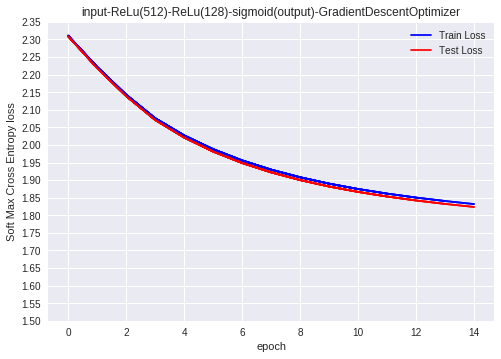

In [ ]:
# We can now launch the model in an InteractiveSession

# We first have to create an operation to initialize the variables we created:
# https://github.com/amitmac/Question-Answering/issues/2

# Note: make sure you initialize variables after AdamOptimizer

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here we use GradientDescentOptimizer
            _, c, w = sess.run([optimizer_relu_sgdc, cost_relu, weights_relu], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_relu, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.5, 2.4, step=0.05), "input-ReLu(512)-ReLu(128)-sigmoid(output)-GradientDescentOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.5, 2.4, step=0.05), "input-ReLu(512)-ReLu(128)-sigmoid(output)-GradientDescentOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(yrelu,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


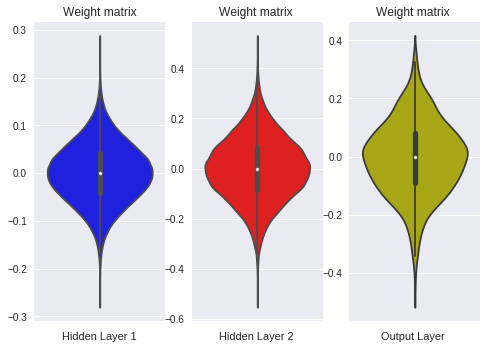

In [ ]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Model 3: Input - Sigmoid(BatchNormalization(512)) - Sigmoid(BatchNormalization(128))- Sigmoid(output) </h3>

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/nn/batch_normalization
# https://r2rt.com/implementing-batch-normalization-in-tensorflow.html
epsilon = 1e-3
def multilayer_perceptron_batch(x, weights, biases):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    
    ############################################################
    # Hidden layer with Sigmoid activation and batch normalization
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    
    # https://www.tensorflow.org/api_docs/python/tf/nn/moments
    # Calculate the mean and variance of x.
    batch_mean_1, batch_var_1 = tf.nn.moments(layer_1,[0])
    
    scale_1 = tf.Variable(tf.ones([n_hidden_1]))
    beta_1 = tf.Variable(tf.zeros([n_hidden_1]))
    
    # https://www.tensorflow.org/api_docs/python/tf/nn/batch_normalization
    layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
    layer_1 = tf.nn.sigmoid(layer_1)
    
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    
    #####################################################################################
    
    # Hidden layer with Sigmoid activation and batch normalization
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    
    # https://www.tensorflow.org/api_docs/python/tf/nn/moments
    # Calculate the mean and variance of x.
    batch_mean_2, batch_var_2 = tf.nn.moments(layer_2, [0])
    
    scale_2 = tf.Variable(tf.ones([n_hidden_2]))
    beta_2 = tf.Variable(tf.zeros([n_hidden_2]))
    
    layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_2, batch_var_2, beta_2, scale_2, epsilon)
    layer_2 = tf.nn.sigmoid(layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', biases['out'].get_shape())        
    
    ######################################################################################
    
    # output layer with Sigmoid activation 
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out']    
    out_layer = tf.nn.sigmoid(out_layer)
    print('out_layer:',out_layer.get_shape())

    return out_layer

__ Model 3+ AdamOptimizer  __

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 train cost=1.700068553 test cost=1.691480070
Epoch: 0002 train cost=1.555593932 test cost=1.551793572
Epoch: 0003 train cost=1.515948518 test cost=1.515595129
Epoch: 0004 train cost=1.500090736 test cost=1.501608725
Epoch: 0005 train cost=1.491691740 test cost=1.495176234
Epoch: 0006 train cost=1.486215817 test cost=1.491377480
Epoch: 0007 train cost=1.481944979 test cost=1.488477005
Epoch: 0008 train cost=1.479413016 test cost=1.486683784
Epoch: 0009 train cost=1.476976019 test cost=1.485592169
Epoch: 0010 train cost=1.475328626 test cost=1.484361933
Epoch: 0011 train cost=1.473508603 test cost=1.483245888
Epoch: 0012 train cost=1.472790788 test cost=1.482792196
Epoch: 0013 train cost=1.471692099 test cost=1.482280265
Epoch: 0014 train cost=1.470980778 test cost=1.481615747
Epoch: 0015 train cost=1.470204555 test cos

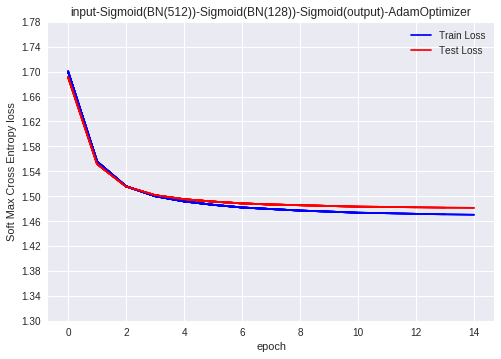

In [ ]:
# Since we are using sigmoid activations in hiden layers we will be using weights that are initalized as weights_sgd
ybatch = multilayer_perceptron_batch(x, weights_sgd, biases)

# https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
cost_batch = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ybatch, labels = y_))
# https://github.com/amitmac/Question-Answering/issues/2
# there are many optimizers available: https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 
optimizer_batch_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_batch)
optimizer_batch_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_batch)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_batch_adam, cost_batch, weights_sgd], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_batch, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Sigmoid(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Sigmoid(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(ybatch,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


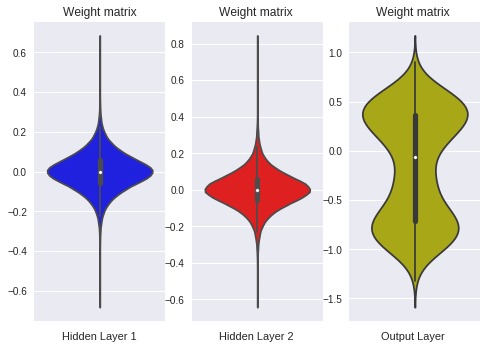

In [ ]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

__ Model 3 + GradientDescentOptimizer  __

Epoch: 0001 train cost=2.312056991 test cost=2.312045197
Epoch: 0002 train cost=2.286723345 test cost=2.286289722
Epoch: 0003 train cost=2.262095340 test cost=2.261143614
Epoch: 0004 train cost=2.237721429 test cost=2.236359837
Epoch: 0005 train cost=2.214522683 test cost=2.212769454
Epoch: 0006 train cost=2.193412623 test cost=2.191231863
Epoch: 0007 train cost=2.174389078 test cost=2.171921795
Epoch: 0008 train cost=2.157141389 test cost=2.154426692
Epoch: 0009 train cost=2.141131058 test cost=2.138286440
Epoch: 0010 train cost=2.126325870 test cost=2.123236751
Epoch: 0011 train cost=2.112224244 test cost=2.109058378
Epoch: 0012 train cost=2.099121217 test cost=2.095732109
Epoch: 0013 train cost=2.086694297 test cost=2.083267775
Epoch: 0014 train cost=2.075242446 test cost=2.071594143
Epoch: 0015 train cost=2.064474456 test cost=2.060690631
Accuracy: 0.125


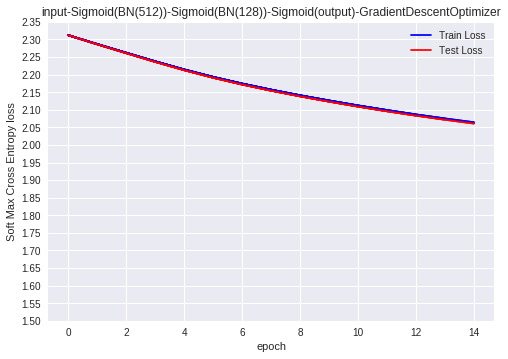

In [ ]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here we use GradientDescentOptimizer
            _, c, w = sess.run([optimizer_batch_sgdc, cost_batch, weights_sgd], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_batch, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax,np.arange(1.5, 2.4, step=0.05), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Sigmoid(output)-GradientDescentOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.5, 2.4, step=0.05), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Sigmoid(output)-GradientDescentOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(ybatch,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


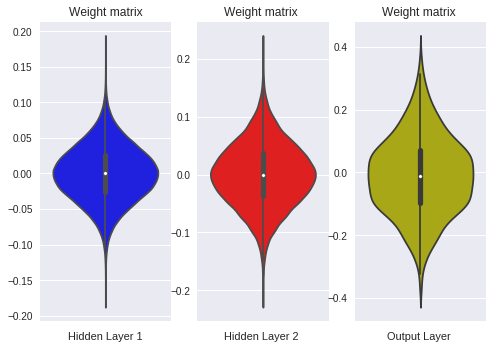

In [ ]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Model 4: Input - ReLu(512) - Dropout - ReLu(128)- Dropout -Sigmoid(output) </h3>

In [ ]:
# https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/multi_layer_perceptron_mnist.html
# Create model
def multilayer_perceptron_dropout(x, weights, biases):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    # we are adding a drop out layer after input layers with parameter keep_prob_input
    
    # Hidden layer with ReLu activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    layer_1 = tf.nn.relu(layer_1)
    # we are adding a drop out layer after the first hidden layer with parameter keep_prob
    layer_1_drop = tf.nn.dropout(layer_1, keep_prob)
    
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    
    # Hidden layer with ReLu activation
    layer_2 = tf.add(tf.matmul(layer_1_drop, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    layer_2 = tf.nn.relu(layer_2)
    # we are adding a drop out layer after the first hidden layer with parameter keep_prob
    layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', biases['out'].get_shape())        
    
    # Output layer with Sigmoid activation
    out_layer = tf.matmul(layer_2_drop, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out']    
    out_layer = tf.nn.sigmoid(out_layer)
    print('out_layer:',out_layer.get_shape())

    return out_layer

__ Model 4 + AdamOptimizer __

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 train cost=1.675481348 test cost=1.598583966
Epoch: 0002 train cost=1.546939785 test cost=1.514125155
Epoch: 0003 train cost=1.524996623 test cost=1.502378711
Epoch: 0004 train cost=1.514395935 test cost=1.496348261
Epoch: 0005 train cost=1.507464443 test cost=1.491901992
Epoch: 0006 train cost=1.502681051 test cost=1.488922666
Epoch: 0007 train cost=1.499395829 test cost=1.486873763
Epoch: 0008 train cost=1.495856912 test cost=1.485843970
Epoch: 0009 train cost=1.493913886 test cost=1.484971796
Epoch: 0010 train cost=1.491971510 test cost=1.483862281
Epoch: 0011 train cost=1.490074936 test cost=1.482910818
Epoch: 0012 train cost=1.488904240 test cost=1.482207586
Epoch: 0013 train cost=1.487357789 test cost=1.481696167
Epoch: 0014 train cost=1.486711373 test cost=1.480950590
Epoch: 0015 train cost=1.485781125 test cos

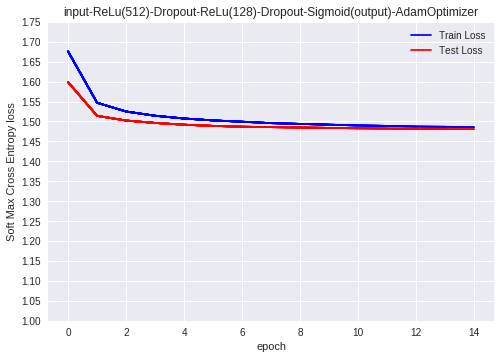

In [ ]:
# Since we are using Relu activations in hiden layers we will be using weights that are initalized as weights_relu
ydrop = multilayer_perceptron_dropout(x, weights_relu, biases)

# https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
cost_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ydrop, labels = y_))
# https://github.com/amitmac/Question-Answering/issues/2
# there are many optimizers available: https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 
optimizer_drop_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_drop)
optimizer_drop_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_drop)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_drop_adam, cost_drop, weights_relu], feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
            train_avg_cost += c / total_batch
            c = sess.run(cost_drop, feed_dict={x: mnist.test.images, y_: mnist.test.labels,  keep_prob: 1.0})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05), "input-ReLu(512)-Dropout-ReLu(128)-Dropout-Sigmoid(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05), "input-ReLu(512)-Dropout-ReLu(128)-Dropout-Sigmoid(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(ydrop,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0 }))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


Text(0.5,0,'Output Layer ')

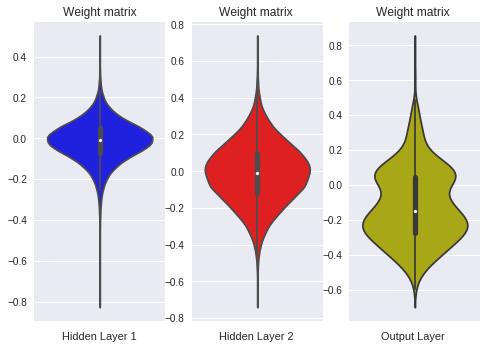

In [ ]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
# plt.show()

### Ruff

In [6]:
# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Network Parameters
# n_hidden_1 = 10  # 1st layer number of neurons
# n_hidden_2 = 5  # 2nd layer number of neurons
# n_input = 784  # MNIST data input (img shape: 28*28)
# n_classes = 10  # MNIST total classes (0-9 digits)

# # Xavier (Glorot) Normal initialization for Sigmoid and Tanh
# weights_xavier = {
#     'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1], stddev=np.sqrt(2.0 / (n_input + n_hidden_1)), mean=0)),
#     'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2], stddev=np.sqrt(2.0 / (n_hidden_1 + n_hidden_2)), mean=0)),
#     'out': tf.Variable(tf.random.normal([n_hidden_2, n_classes], stddev=np.sqrt(2.0 / (n_hidden_2 + n_classes)), mean=0))
# }

# # He Normal initialization for ReLU
# weights_he = {
#     'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1], stddev=np.sqrt(2.0 / n_input), mean=0)),
#     'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2], stddev=np.sqrt(2.0 / n_hidden_1), mean=0)),
#     'out': tf.Variable(tf.random.normal([n_hidden_2, n_classes], stddev=np.sqrt(2.0 / n_hidden_2), mean=0))
# }

# # Biases initialization (common for all)
# biases = {
#     'b1': tf.Variable(tf.random.normal([n_hidden_1])),
#     'b2': tf.Variable(tf.random.normal([n_hidden_2])),
#     'out': tf.Variable(tf.random.normal([n_classes]))
# }

# # Data Preparation
# (X_train_images, y_train_labels), (X_test_images, y_test_labels) = tf.keras.datasets.mnist.load_data()
# X_train_images = X_train_images.reshape([-1, 784]).astype('float32') / 255.0
# X_test_images = X_test_images.reshape([-1, 784]).astype('float32') / 255.0
# y_train_labels = tf.keras.utils.to_categorical(y_train_labels, 10)
# y_test_labels = tf.keras.utils.to_categorical(y_test_labels, 10)

# train_dataset = tf.data.Dataset.from_tensor_slices((X_train_images, y_train_labels)).shuffle(60000).batch(100)
# test_dataset = tf.data.Dataset.from_tensor_slices((X_test_images, y_test_labels)).batch(100)

# # Model definition
# def multilayer_perceptron(x, weights, biases, activation):
#     # Hidden layer 1
#     layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
#     if activation == 'sigmoid':
#         layer_1 = tf.nn.sigmoid(layer_1)
#     elif activation == 'tanh':
#         layer_1 = tf.nn.tanh(layer_1)
#     elif activation == 'relu':
#         layer_1 = tf.nn.relu(layer_1)

#     # Hidden layer 2
#     layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
#     if activation == 'sigmoid':
#         layer_2 = tf.nn.sigmoid(layer_2)
#     elif activation == 'tanh':
#         layer_2 = tf.nn.tanh(layer_2)
#     elif activation == 'relu':
#         layer_2 = tf.nn.relu(layer_2)

#     # Output layer
#     out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
#     return tf.nn.softmax(out_layer)

# # Training step
# def train_step(images, labels, model_func, optimizer, loss_func):
#     with tf.GradientTape() as tape:
#         predictions = model_func(images)
#         loss_value = loss_func(labels, predictions)
#     grads = tape.gradient(loss_value, [*weights.values(), *biases.values()])
#     optimizer.apply_gradients(zip(grads, [*weights.values(), *biases.values()]))
#     return loss_value

# # Training function
# def train_model(weights, biases, activation, optimizer, train_dataset, num_epochs):
#     loss_func = tf.keras.losses.CategoricalCrossentropy()
#     losses = []

#     for epoch in range(num_epochs):
#         epoch_loss_avg = tf.keras.metrics.Mean()
#         for images, labels in train_dataset:
#             model_func = lambda x: multilayer_perceptron(x, weights, biases, activation)
#             loss = train_step(images, labels, model_func, optimizer, loss_func)
#             epoch_loss_avg.update_state(loss)
#         losses.append(epoch_loss_avg.result().numpy())
#         if (epoch + 1) % 5 == 0:
#             print(f"Epoch {epoch + 1}, Loss: {epoch_loss_avg.result().numpy()}")

#     return losses

# # Model accuracy
# def model_accuracy(weights, biases, activation, test_dataset):
#     accuracy_metric = tf.keras.metrics.CategoricalAccuracy()
#     for images, labels in test_dataset:
#         predictions = multilayer_perceptron(images, weights, biases, activation)
#         accuracy_metric.update_state(labels, predictions)
#     return accuracy_metric.result().numpy()

# # Plotting loss over epochs
# def plot_loss(num_epochs, losses, title):
#     sns.set_style("dark")
#     plt.plot(range(1, num_epochs + 1), losses, 'b', label='Train Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.title(title)
#     plt.legend()
#     plt.show()

# # Main execution
# num_epochs = 10
# activations = ['sigmoid', 'tanh', 'relu']
# optimizers = {
#     'SGD': tf.optimizers.SGD(learning_rate=0.05)
# }

# for activation in activations:
#     for opt_name, optimizer in optimizers.items():
#         if activation == 'relu':
#             weights = weights_he
#         else:
#             weights = weights_xavier
#         print(f"Training model with {activation} activation and {opt_name} optimizer...")
#         losses = train_model(weights, biases, activation, optimizer, train_dataset, num_epochs)
#         plot_loss(num_epochs, losses, f"Loss over Epochs ({activation} + {opt_name})")
#         test_accuracy = model_accuracy(weights, biases, activation, test_dataset)
#         print(f"Test Accuracy with {activation} activation and {opt_name} optimizer: {test_accuracy:.2f}")


- **TensorFlow**

Training model with sigmoid activation and SGD optimizer...
Epoch 5, Loss: 1.3647228479385376
Epoch 10, Loss: 0.770022988319397


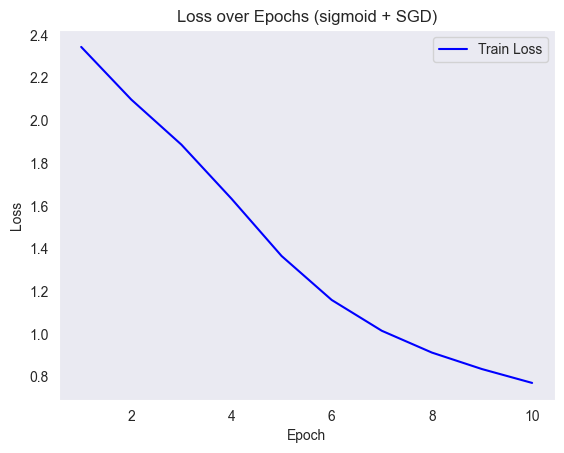

Test Accuracy with sigmoid activation and SGD optimizer: 0.83
Training model with tanh activation and SGD optimizer...
Epoch 5, Loss: 0.39848780632019043
Epoch 10, Loss: 0.3086045980453491


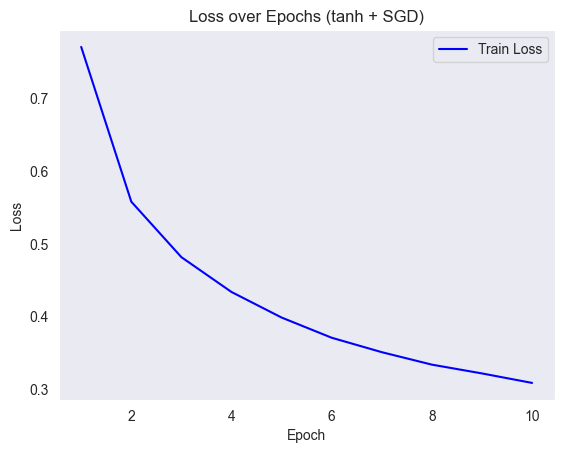

Test Accuracy with tanh activation and SGD optimizer: 0.92
Training model with relu activation and SGD optimizer...
Epoch 5, Loss: 0.4088819622993469
Epoch 10, Loss: 0.33726850152015686


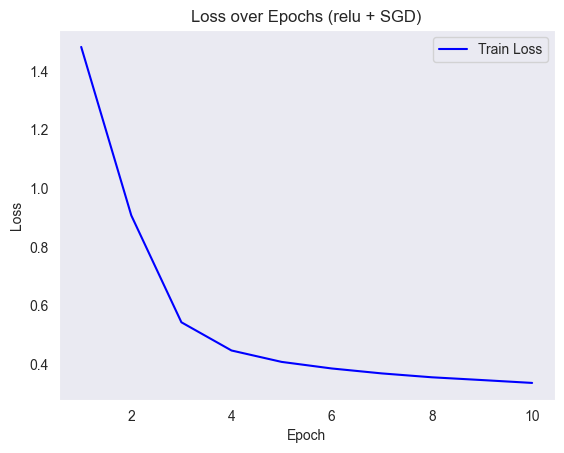

Test Accuracy with relu activation and SGD optimizer: 0.91


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Network Parameters
n_hidden_1 = 10  # 1st layer number of neurons
n_hidden_2 = 5  # 2nd layer number of neurons
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Xavier (Glorot) Normal initialization for Sigmoid and Tanh
def xavier_init(n_in, n_out):
    stddev = np.sqrt(2.0 / (n_in + n_out))
    return tf.random.normal([n_in, n_out], stddev=stddev, mean=0)

weights_xavier = {
    'h1': tf.Variable(xavier_init(n_input, n_hidden_1)),
    'h2': tf.Variable(xavier_init(n_hidden_1, n_hidden_2)),
    'out': tf.Variable(xavier_init(n_hidden_2, n_classes))
}

# He Normal initialization for ReLU
def he_init(n_in, n_out):
    stddev = np.sqrt(2.0 / n_in)
    return tf.random.normal([n_in, n_out], stddev=stddev, mean=0)

weights_he = {
    'h1': tf.Variable(he_init(n_input, n_hidden_1)),
    'h2': tf.Variable(he_init(n_hidden_1, n_hidden_2)),
    'out': tf.Variable(he_init(n_hidden_2, n_classes))
}

# Biases initialization (common for all)
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_classes]))
}

# Data Preparation
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = tf.keras.datasets.mnist.load_data()
X_train_images = X_train_images.reshape([-1, 784]).astype('float32') / 255.0
X_test_images = X_test_images.reshape([-1, 784]).astype('float32') / 255.0
y_train_labels = tf.keras.utils.to_categorical(y_train_labels, 10)
y_test_labels = tf.keras.utils.to_categorical(y_test_labels, 10)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_images, y_train_labels)).shuffle(60000).batch(100)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_images, y_test_labels)).batch(100)

# Model definition
def multilayer_perceptron(x, weights, biases, activation):
    # Hidden layer 1
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    if activation == 'sigmoid':
        layer_1 = tf.nn.sigmoid(layer_1)
    elif activation == 'tanh':
        layer_1 = tf.nn.tanh(layer_1)
    elif activation == 'relu':
        layer_1 = tf.nn.relu(layer_1)

    # Hidden layer 2
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    if activation == 'sigmoid':
        layer_2 = tf.nn.sigmoid(layer_2)
    elif activation == 'tanh':
        layer_2 = tf.nn.tanh(layer_2)
    elif activation == 'relu':
        layer_2 = tf.nn.relu(layer_2)

    # Output layer
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return tf.nn.softmax(out_layer)

# Training step
def train_step(images, labels, model_func, optimizer, loss_func):
    with tf.GradientTape() as tape:
        predictions = model_func(images)
        loss_value = loss_func(labels, predictions)
    grads = tape.gradient(loss_value, [*weights.values(), *biases.values()])
    optimizer.apply_gradients(zip(grads, [*weights.values(), *biases.values()]))
    return loss_value

# Training function
def train_model(weights, biases, activation, optimizer, train_dataset, num_epochs):
    loss_func = tf.keras.losses.CategoricalCrossentropy()
    losses = []

    for epoch in range(num_epochs):
        epoch_loss_avg = tf.keras.metrics.Mean()
        for images, labels in train_dataset:
            model_func = lambda x: multilayer_perceptron(x, weights, biases, activation)
            loss = train_step(images, labels, model_func, optimizer, loss_func)
            epoch_loss_avg.update_state(loss)
        losses.append(epoch_loss_avg.result().numpy())
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch + 1}, Loss: {epoch_loss_avg.result().numpy()}")

    return losses

# Model accuracy
def model_accuracy(weights, biases, activation, test_dataset):
    accuracy_metric = tf.keras.metrics.CategoricalAccuracy()
    for images, labels in test_dataset:
        predictions = multilayer_perceptron(images, weights, biases, activation)
        accuracy_metric.update_state(labels, predictions)
    return accuracy_metric.result().numpy()

# Plotting loss over epochs
def plot_loss(num_epochs, losses, title):
    sns.set_style("dark")
    plt.plot(range(1, num_epochs + 1), losses, 'b', label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

# Main execution
num_epochs = 10
activations = ['sigmoid', 'tanh', 'relu']
optimizer_constructors = {
    'SGD': lambda: tf.optimizers.SGD(learning_rate=0.05)
}

for activation in activations:
    for opt_name, opt_constructor in optimizer_constructors.items():
        if activation == 'relu':
            weights = weights_he
        else:
            weights = weights_xavier
        optimizer = opt_constructor()  # Create a new optimizer instance
        print(f"Training model with {activation} activation and {opt_name} optimizer...")
        losses = train_model(weights, biases, activation, optimizer, train_dataset, num_epochs)
        plot_loss(num_epochs, losses, f"Loss over Epochs ({activation} + {opt_name})")
        test_accuracy = model_accuracy(weights, biases, activation, test_dataset)
        print(f"Test Accuracy with {activation} activation and {opt_name} optimizer: {test_accuracy:.2f}")


- **Keras**

In [8]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.optimizers import SGD, Adam
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Network Parameters
# n_hidden_1 = 10  # 1st layer number of neurons
# n_hidden_2 = 5  # 2nd layer number of neurons
# n_input = 784  # MNIST data input (img shape: 28*28)
# n_classes = 10  # MNIST total classes (0-9 digits)

# # Xavier (Glorot) Normal initialization for Sigmoid and Tanh
# initializer_xavier = tf.keras.initializers.GlorotNormal()

# # He Normal initialization for ReLU
# initializer_he = tf.keras.initializers.HeNormal()

# # Data Preparation
# (X_train_images, y_train_labels), (X_test_images, y_test_labels) = tf.keras.datasets.mnist.load_data()
# X_train_images = X_train_images.reshape([-1, 784]).astype('float32') / 255.0
# X_test_images = X_test_images.reshape([-1, 784]).astype('float32') / 255.0
# y_train_labels = tf.keras.utils.to_categorical(y_train_labels, 10)
# y_test_labels = tf.keras.utils.to_categorical(y_test_labels, 10)

# # Model definition function
# def build_model(activation, initializer):
#     model = Sequential()
#     model.add(Dense(n_hidden_1, input_shape=(n_input,), kernel_initializer=initializer))
#     model.add(Activation(activation))
#     model.add(Dense(n_hidden_2, kernel_initializer=initializer))
#     model.add(Activation(activation))
#     model.add(Dense(n_classes, kernel_initializer=initializer))
#     model.add(Activation('softmax'))
#     return model

# # Training function
# def train_and_evaluate(activation, optimizer, initializer):
#     model = build_model(activation, initializer)
#     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#     history = model.fit(X_train_images, y_train_labels, epochs=num_epochs, batch_size=100, validation_data=(X_test_images, y_test_labels), verbose=1)
    
#     test_loss, test_accuracy = model.evaluate(X_test_images, y_test_labels, verbose=0)
#     return history.history['loss'], test_accuracy

# # Plotting loss over epochs
# def plot_loss(num_epochs, losses, title):
#     sns.set_style("dark")
#     plt.plot(range(1, num_epochs + 1), losses, 'b', label='Train Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.title(title)
#     plt.legend()
#     plt.show()

# # Main execution
# num_epochs = 10
# activations = ['sigmoid', 'tanh', 'relu']
# optimizers = {
#     'SGD': SGD(learning_rate=0.05)#,
#     #'Adam': Adam(learning_rate=0.001)
# }

# for activation in activations:
#     for opt_name, optimizer in optimizers.items():
#         if activation == 'relu':
#             initializer = initializer_he
#         else:
#             initializer = initializer_xavier

#         print(f"Training model with {activation} activation and {opt_name} optimizer...")
#         losses, test_accuracy = train_and_evaluate(activation, optimizer, initializer)
#         plot_loss(num_epochs, losses, f"Loss over Epochs ({activation} + {opt_name})")
#         print(f"Test Accuracy with {activation} activation and {opt_name} optimizer: {test_accuracy:.2f}")


Training model with sigmoid activation and SGD optimizer...
Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1530 - loss: 2.2958 - val_accuracy: 0.2923 - val_loss: 2.2006
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.3097 - loss: 2.1426 - val_accuracy: 0.3174 - val_loss: 1.9219
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.3540 - loss: 1.8559 - val_accuracy: 0.4530 - val_loss: 1.6671
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - accuracy: 0.4815 - loss: 1.6135 - val_accuracy: 0.6047 - val_loss: 1.4866
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.5972 - loss: 1.4487 - val_accuracy: 0.6813 - val_loss: 1.3305
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - accuracy: 0.6777 - loss: 1.3010 - val_accuracy: 0.7203 - val_loss: 1.1889
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.7157 - loss: 1.1621 - val_accuracy: 0.7505 - val_loss: 1.0645
Epoch 8/10
600/600 ━━━━━━━━━━━━━

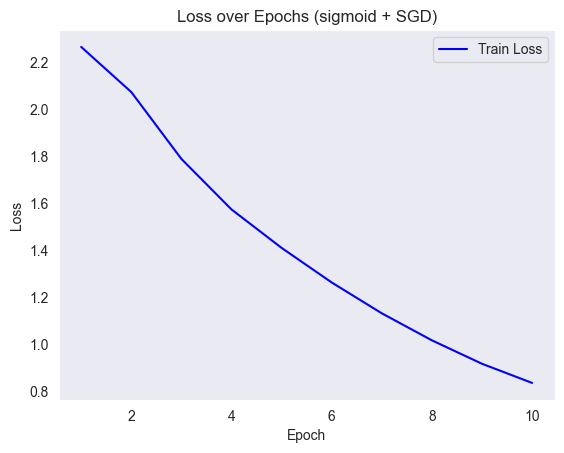

Test Accuracy with sigmoid activation and SGD optimizer: 0.80
Training model with tanh activation and SGD optimizer...
Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4898 - loss: 1.5928 - val_accuracy: 0.7650 - val_loss: 0.8952
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.7917 - loss: 0.8084 - val_accuracy: 0.8588 - val_loss: 0.5977
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.8681 - loss: 0.5539 - val_accuracy: 0.8905 - val_loss: 0.4580
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.8892 - loss: 0.4394 - val_accuracy: 0.8973 - val_loss: 0.3960
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.9012 - loss: 0.3856 - val_accuracy: 0.9060 - val_loss: 0.3602
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.9090 - loss: 0.3456 - val_accuracy: 0.9082 - val_loss: 0.3418
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.9137 - loss: 0.3257 - val_accuracy:

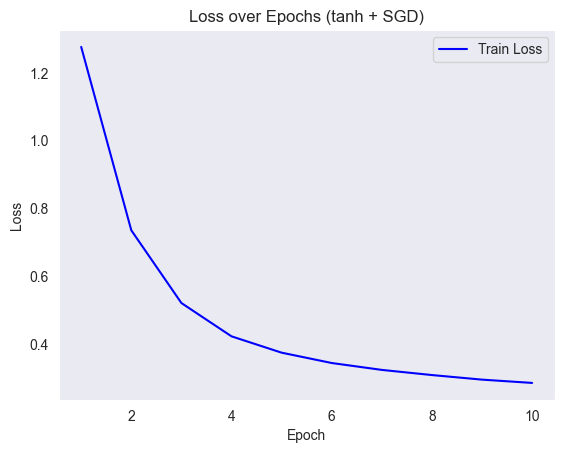

Test Accuracy with tanh activation and SGD optimizer: 0.92
Training model with relu activation and SGD optimizer...
Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5369 - loss: 1.3847 - val_accuracy: 0.8006 - val_loss: 0.6661
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.8074 - loss: 0.6434 - val_accuracy: 0.8432 - val_loss: 0.5230
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.8551 - loss: 0.4949 - val_accuracy: 0.8801 - val_loss: 0.4106
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 0.8801 - loss: 0.4234 - val_accuracy: 0.8902 - val_loss: 0.3781
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.8918 - loss: 0.3809 - val_accuracy: 0.8969 - val_loss: 0.3600
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.9012 - loss: 0.3536 - val_accuracy: 0.9047 - val_loss: 0.3361
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.9075 - loss: 0.3376 - val_accuracy: 0.

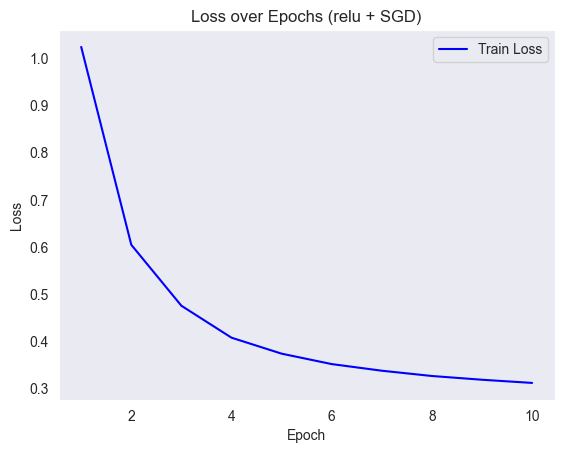

Test Accuracy with relu activation and SGD optimizer: 0.90


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Network Parameters
n_hidden_1 = 10  # 1st layer number of neurons
n_hidden_2 = 5  # 2nd layer number of neurons
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Xavier (Glorot) Normal initialization for Sigmoid and Tanh
initializer_xavier = tf.keras.initializers.GlorotNormal()

# He Normal initialization for ReLU
initializer_he = tf.keras.initializers.HeNormal()

# Data Preparation
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = tf.keras.datasets.mnist.load_data()
X_train_images = X_train_images.reshape([-1, 784]).astype('float32') / 255.0
X_test_images = X_test_images.reshape([-1, 784]).astype('float32') / 255.0
y_train_labels = tf.keras.utils.to_categorical(y_train_labels, 10)
y_test_labels = tf.keras.utils.to_categorical(y_test_labels, 10)

# Model definition function
def build_model(activation, initializer):
    model = Sequential()
    model.add(Dense(n_hidden_1, input_shape=(n_input,), kernel_initializer=initializer))
    model.add(Activation(activation))
    model.add(Dense(n_hidden_2, kernel_initializer=initializer))
    model.add(Activation(activation))
    model.add(Dense(n_classes, kernel_initializer=initializer))
    model.add(Activation('softmax'))
    return model

# Training function
def train_and_evaluate(activation, optimizer_class, learning_rate, initializer):
    model = build_model(activation, initializer)
    optimizer = optimizer_class(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_images, y_train_labels, epochs=num_epochs, batch_size=100, validation_data=(X_test_images, y_test_labels), verbose=1)
    
    test_loss, test_accuracy = model.evaluate(X_test_images, y_test_labels, verbose=0)
    return history.history['loss'], test_accuracy

# Plotting loss over epochs
def plot_loss(num_epochs, losses, title):
    sns.set_style("dark")
    plt.plot(range(1, num_epochs + 1), losses, 'b', label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

# Main execution
num_epochs = 10
activations = ['sigmoid', 'tanh', 'relu']
optimizer_specs = {
    'SGD': (SGD, 0.05)
}

for activation in activations:
    for opt_name, (optimizer_class, learning_rate) in optimizer_specs.items():
        if activation == 'relu':
            initializer = initializer_he
        else:
            initializer = initializer_xavier

        print(f"Training model with {activation} activation and {opt_name} optimizer...")
        losses, test_accuracy = train_and_evaluate(activation, optimizer_class, learning_rate, initializer)
        plot_loss(num_epochs, losses, f"Loss over Epochs ({activation} + {opt_name})")
        print(f"Test Accuracy with {activation} activation and {opt_name} optimizer: {test_accuracy:.2f}")
